# 05: Face Recognition (dlib/resnet)


Demonstration of using the face_recognition library at https://github.com/ageitgey/face_recognition


In [1]:
import os, sys
import os.path as osp
import cv2
import dlib
import numpy as np
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition
from face_recognition import api
%reload_ext autoreload
%autoreload 2
from utils import imx
from config import config as cfg

In [2]:
# init dlib
dlib_predictor_path = osp.join(cfg.MODELS_DIR,'dlib/shape_predictor_68_face_landmarks.dat')
predictor = dlib.shape_predictor(dlib_predictor_path)
detector = dlib.get_frontal_face_detector()

In [3]:
# Detect faces with dlib
def detect_faces_dlib(im,pyramids=0):
    rects = detector(im, pyramids)
    faces = [ (r.left(),r.top(),r.right(),r.bottom()) for r in rects] #x1,y1,x2,y2
    return faces

In [99]:
# Get face encodings with dlib/face_recognition libraries
# Return only the first face
def get_encoding(im,roi):
    x1,y1,x2,y2 = roi
    w,h = (im.shape[1],im.shape[0])
    # face_recognition library uses CSS position, convert to roi_css
    roi_css = (max(y1,0), min(x2,w),min(y2,h),max(x1,0))
    face_enc = face_recognition.face_encodings(im,known_face_locations=[roi_css],num_jitters=3)
    # Increase accuracy by adding jitters, speed up by decreasing
    #face_recognition.api.face_encodings(face_image, known_face_locations=None, num_jitters=0)
    if face_enc is None or len(face_enc) == 0:
        print('[-] no face enc')
        return None
    else:
        print('[+] Calculated face encoding')
        return face_enc[0]

In [100]:
# Create list for encodings
# Then enroll Obama and Biden
encodings = []

[+] Calculated face encoding


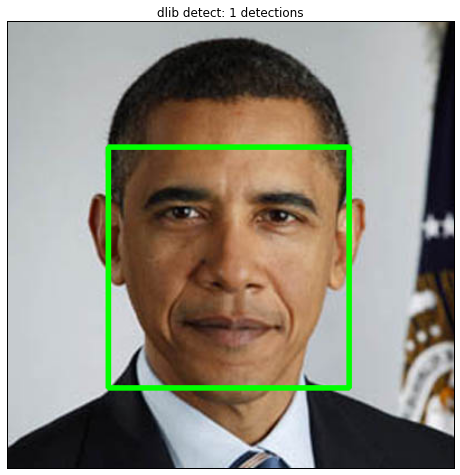

In [101]:
# Load image
fpath = osp.join(cfg.IMAGES_DIR,'test/obama.jpg')
im = cv2.imread(fpath)

# Detect faces
faces = detect_faces_dlib(im,pyramids=0)
dst = im.copy()

# Draw rect
face = faces[0]
x1,y1,x2,y2 = face
cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)

# Get encoding
enc = get_encoding(im,face)
encodings.append({'name':'Obama', 'enc':enc})

# Plot
title='dlib detect: {} detections'.format(len(faces))
imx.pltimg(dst,mode='bgr',title=title)

[+] Calculated face encoding


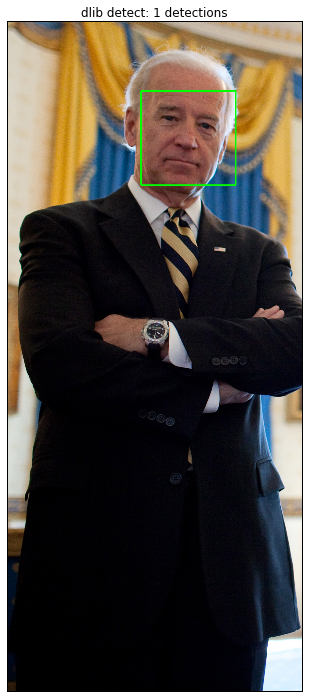

In [102]:
# Load
fpath = osp.join(cfg.IMAGES_DIR,'test/biden.jpg')
im = cv2.imread(fpath)

# Detect
faces = detect_faces_dlib(im,pyramids=0)

# Draw
dst = im.copy()
face = faces[0]
x1,y1,x2,y2 = face
cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)

# Encode
enc = get_encoding(im,face)
encodings.append({'name':'Biden', 'enc':enc})

# Plot
title='dlib detect: {} detections'.format(len(faces))
imx.pltimg(dst,mode='bgr',title=title)

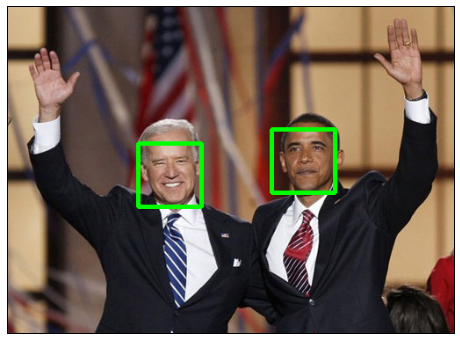

In [103]:
# Load a new photo, then detect people
fpath = osp.join(cfg.IMAGES_DIR,'test/obama-biden.jpg')
im = cv2.imread(fpath)

# Detect
faces = detect_faces_dlib(im,pyramids=0)

# Draw
dst = im.copy()
for face in faces:
    x1,y1,x2,y2 = face
    cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)

imx.pltimg(dst,mode='bgr')

In [104]:
faces_to_compare_idxs = [enc['enc'] for enc in encodings]

[+] Calculated face encoding
0.433750612465
Found Obama
[+] Calculated face encoding
0.41463343178
Found Biden


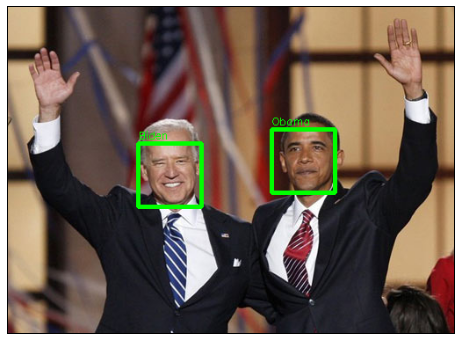

In [105]:
# Get name of person
dst = im.copy()
clr = (0,255,0)
for face in faces:
    # Encode
    enc = get_encoding(im,face)
    distance_results = api.face_distance(faces_to_compare_idxs,enc)
    distance_results = np.array(distance_results)
    # distances below 0.6, according to author, are considered a match
    if(dist < 0.6):
        idx = distance_results.argmin()
        dist = distance_results[idx]
        print(dist)
        name = encodings[idx]['name']
        print('Found {}'.format(name))
        # Draw their name and bbox
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)
        tx_pt = (x1,y1-5)
        cv2.putText(dst, name, tx_pt, cv2.FONT_HERSHEY_SIMPLEX, .4,clr)
    else:
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),1)
    
imx.pltimg(dst,mode='bgr')

In [106]:
# Display reuslts

In [107]:
#distance_results = api.face_distance(faces_to_compare,new_enc)

[+] Calculated face encoding
[ 0.49469885  0.69128651]
Found Obama


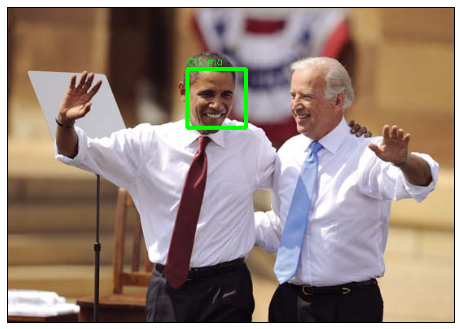

In [108]:
# Load
fpath = osp.join(cfg.IMAGES_DIR,'test/obama-biden2.jpg')
im = cv2.imread(fpath)

# Detect
faces = detect_faces_dlib(im,pyramids=0)

# Draw
dst = im.copy()
for face in faces:
    x1,y1,x2,y2 = face
    cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)

# Get name of person
dst = im.copy()
clr = (0,255,0)
for face in faces:
    # Encode
    enc = get_encoding(im,face)
    distance_results = api.face_distance(faces_to_compare_idxs,enc)
    distance_results = np.array(distance_results)
    print(distance_results)
    idx = distance_results.argmin()
    dist = distance_results[idx]
    if(dist < 0.6):
        name = encodings[idx]['name']
        print('Found {}'.format(name))
        # Draw their name and bbox
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)
        tx_pt = (x1,y1-5)
        cv2.putText(dst, name, tx_pt, cv2.FONT_HERSHEY_SIMPLEX, .4,clr)
    else:
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),1)

imx.pltimg(dst,mode='bgr')

[+] Calculated face encoding
[+] Calculated face encoding
[+] Calculated face encoding
Found Biden
[+] Calculated face encoding
[+] Calculated face encoding


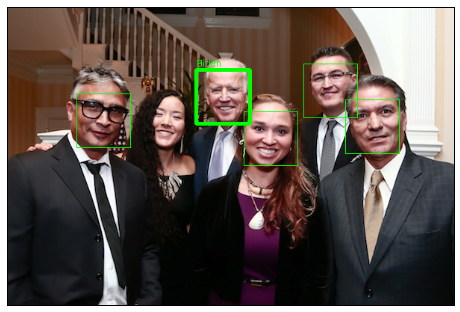

In [84]:
# Load
fpath = osp.join(cfg.IMAGES_DIR,'test/biden2.jpg')
im = cv2.imread(fpath)

# Detect
faces = detect_faces_dlib(im,pyramids=0)

# Get name of person
dst = im.copy()
clr = (0,255,0)

for face in faces:
    # Encode
    enc = get_encoding(im,face)
    distance_results = api.face_distance(faces_to_compare_idxs,enc)
    distance_results = np.array(distance_results)
    idx = distance_results.argmin()
    dist = distance_results[idx]
    if(dist < 0.6):
        name = encodings[idx]['name']
        print('Found {}'.format(name))
        # Draw their name and bbox
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)
        tx_pt = (x1,y1-5)
        cv2.putText(dst, name, tx_pt, cv2.FONT_HERSHEY_SIMPLEX, .4,clr)
    else:
        x1,y1,x2,y2 = face
        cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),1)

imx.pltimg(dst,mode='bgr')